# Урок 7. Анализ выживаемости

## Домашнее задание  
- Проведите анализ выживаемости пациентов с раком толстой кишки на приложенном к уроку датасете, используя код с занятия.
- Попробуйте сравнить кривые выживаемости с различными ковариатами.

Задание выполняется на языке R и предоставляется в формате Google Colab

### Загрузка библиотек и чтение файлов

In [58]:
R.version.string

[1] "R version 4.4.1 (2024-06-14)"

In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")
install.packages("gplots")
install.packages("skimr")
install.packages("psych")
# install.packages("gridExtra")
# install.packages("moments")
# install.packages("fitdistrplus")
# install.packages("data.table")
# install.packages("car")
# install.packages("rstatix")
# install.packages("emmeans")
# install.packages("ez")
# install.packages("MASS")
# install.packages("tidyr")
# install.packages("stats")

# install.packages("simpleboot")
# install.packages("coin")
# install.packages("boot")
# install.packages("jackknifeR")

# install.packages("MuMIn")
# install.packages("caret")
# install.packages("resample")
# install.packages("corrplot")
# install.packages("pROC")
# install.packages("lme4")
# install.packages("nnet")
# install.packages("plotly")
# install.packages("fastDummies")
# install.packages("yardstick")

install.packages("survival")
install.packages("survminer") # Для визуализации
install.packages("gtsummary")
install.packages("IRdisplay")
# install.packages("ggforest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
library(ggplot2)
library(gplots)
library(skimr)
library(psych)
# library(gridExtra)
# library(moments)
# library(car)
# library(fitdistrplus)
# library(rstatix)
# library(emmeans)
# library(ez)
# library(MASS)
# library(tidyr)
# library(stats)

# library(tibble)
# library(dplyr)
# library(simpleboot)
# library(coin)
# library(boot)
# library(jackknifeR)

# library(MuMIn)
# library(caret)
# library(resample)
# library(corrplot)
# library(pROC)
# library(lme4)
# library(nnet)
# library(plotly)
# library(fastDummies)
# library(yardstick)

library(survival)
library(survminer)
library(gtsummary)
library(IRdisplay)
# library(ggforest)

> Примечание: колонка etype в датасете разделает два типа событий. Событие 1 - рецидив, событие 2 - смерть

In [3]:
data <- read.table("/content/21_7_files/colon_dataset.tsv", header = TRUE, sep = "\t")
data

id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,1
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,293,2
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,245,1
5,1,Obs,1,69,0,0,0,22,1,2,3,1,1,659,2


### Описание колонок

1. id: Идентификатор пациента.
2. study: Номер или идентификатор исследования, в котором участвует пациент.
3. rx: Лечение, которое получает пациент. Например, "Lev+5FU" указывает на комбинацию препаратов.
4. sex: Пол пациента (0 для женщин, 1 для мужчин).
5. age: Возраст пациента в годах.
6. obstruct: Наличие обструкции (0 - нет, 1 - да).
7. perfor: Наличие перфорации (0 - нет, 1 - да).
8. adhere: Наличие спаек в кишечнике (0 - нет, 1 - да).
9. nodes: Количество пораженных лимфатических узлов.
10. status: Статус пациента (0 - здоров, 1 - болен).
11. differ: Степень дифференцировки опухоли (1 - высокая, 2 - умеренная, 3 - низкая).
12. extent: Степень распространения заболевания (0 - ограниченное, 1 - местное, 2 - региональное, 3 - отдаленное).
13. surg: Проведение хирургического вмешательства (0 - нет, 1 - да).
14. node4: Поражение сторожевого лимфатического узла (0 - нет, 1 - да).
15. time: Время наблюдения за пациентом (в днях).
16. etype: Тип события (1 - рецидив, 2 - смерть).

In [4]:
names(data)

[1] "id"       "study"    "rx"       "sex"      "age"      "obstruct"
 [7] "perfor"   "adhere"   "nodes"    "status"   "differ"   "extent"  
[13] "surg"     "node4"    "time"     "etype"

In [34]:
summary(data)

       id          study         rx      sex          age        obstruct
 Min.   :  1   Min.   :1   Lev    :620   0:890   Min.   :18.00   0:1498  
 1st Qu.:233   1st Qu.:1   Lev+5FU:608   1:968   1st Qu.:53.00   1: 360  
 Median :465   Median :1   Obs    :630           Median :61.00           
 Mean   :465   Mean   :1                         Mean   :59.75           
 3rd Qu.:697   3rd Qu.:1                         3rd Qu.:69.00           
 Max.   :929   Max.   :1                         Max.   :85.00           
                                                                         
 perfor   adhere       nodes       status      differ          extent     
 0:1804   0:1588   Min.   : 0.00   0:938   Min.   :1.000   Min.   :1.000  
 1:  54   1: 270   1st Qu.: 1.00   1:920   1st Qu.:2.000   1st Qu.:3.000  
                   Median : 2.00           Median :2.000   Median :3.000  
                   Mean   : 3.66           Mean   :2.063   Mean   :2.887  
                   3rd Qu.: 5.00 

In [6]:
# Заменим значения в колонке `etype` на 0 и 1
data$etype[data$etype == 1] <- 0
data$etype[data$etype == 2] <- 1

In [7]:
head(data)

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,1
2,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,0
3,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
4,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,0
5,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,1
6,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,0


In [8]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(all_of(columns), as.factor),
                        across(!all_of(columns), as.numeric))
  return(data)
}

In [9]:
# Создадим список колонок, которые мы переведем в Factor
factor_cols <- c('rx', 'sex', 'obstruct', 'perfor', 'adhere', 'status', 'surg', 'node4', 'etype')

In [10]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,1
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,0
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,0
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,1
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,0
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,293,1
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,245,0
5,1,Obs,1,69,0,0,0,22,1,2,3,1,1,659,1


In [11]:
# Для удобства переведем дни в колонке 'time' в месяцы
data <- data %>%
  mutate(time.months = round(time / 30.44))
head(data)

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype,time.months
,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,1,50
2,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,0,32
3,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1,101
4,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,0,101
5,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,1,32
6,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,0,18


In [40]:
# Сохранение обновленной таблицы в файл
write_xlsx(data, "/content/21_7_files/data.xlsx")

In [12]:
levels(factor(rep(c(1, 0), 929) == data$etype))

[1] "TRUE"

In [13]:
table(data$rx)


    Lev Lev+5FU     Obs 
    620     608     630 

### Общая выживаемость (Overall Survival, OS) и Выживаемость без прогрессирования (Progression-Free Survival, PFS) при разных схемах терапии
В исследованиях методов терапии онкологических заболеваний наиболее важными являются показатели Общей выживаемости (Overall Survival, OS) и Выживаемость без прогрессирования (Progression-Free Survival, PFS). Имея сет данных по колоректальному раку мы можем оценить эффективность терапии Лейковорином в комбинации с 5-Фторурацилом и без по сравнению с плацебо.  
Мы имеем данные 929 пациентов разбитых на 3 группы:
1. Lev - 310 пациентов получает только Лейковорин
2. Lev+5FU - 304 пациента получает Лейковорин в комбинации с 5-Фторурацилом
3. Obs - 315 пациентов получает плацебо

In [14]:
# Создание объектов выживаемости для OS и PFS
os_data <- with(data, Surv(time.months, etype == 1))
pfs_data <- with(data, Surv(time.months, etype == 0))

In [15]:
# Построение моделей Каплана-Мейера для OS и PFS
os_fit <- survfit(os_data ~ rx, data = data)
pfs_fit <- survfit(pfs_data ~ rx, data = data)

In [16]:
options(repr.plot.width = 10, repr.plot.height = 10)
# par(mfrow=c(1,4))

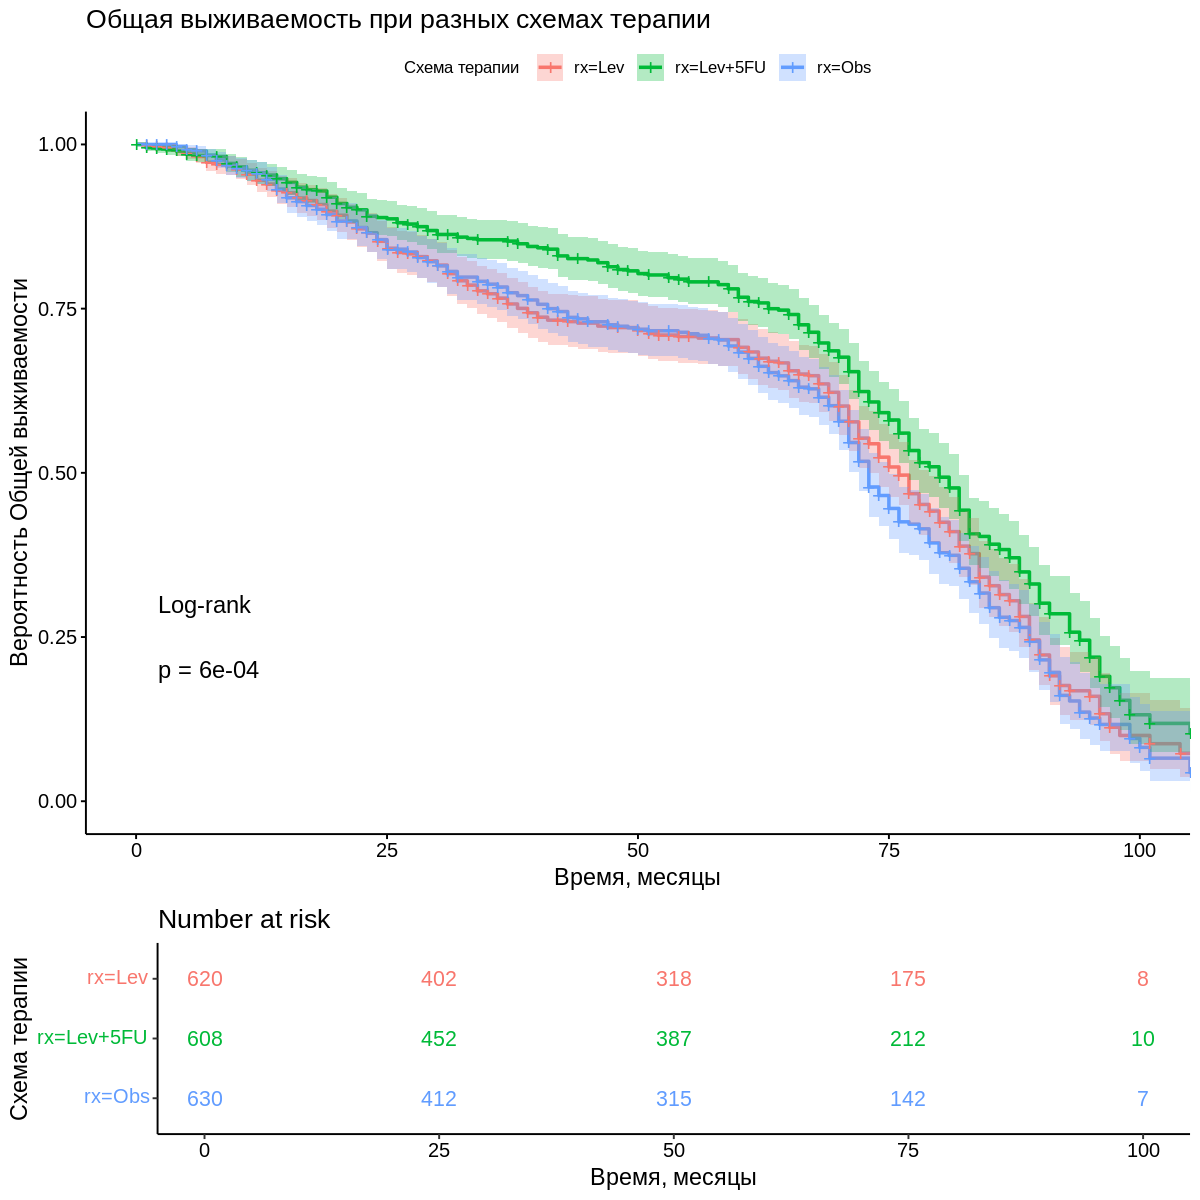

In [17]:
# Визуализация кривых выживаемости
ggsurvplot(os_fit, data = data, pval = TRUE, conf.int = TRUE,
           pval.method = TRUE,
           risk.table = TRUE,
           risk.table.col = "strata",
           xlab = "Время, месяцы",
           ylab = "Вероятность Общей выживаемости",
           title = "Общая выживаемость при разных схемах терапии",
           legend.title = "Схема терапии")

In [18]:
summary(os_fit, times = 60)

Call: survfit(formula = os_data ~ rx, data = data)

                rx=Lev 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     301.0000     150.0000       0.6911       0.0212       0.6507 
upper 95% CI 
      0.7340 

                rx=Lev+5FU 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     366.0000     120.0000       0.7673       0.0187       0.7315 
upper 95% CI 
      0.8050 

                rx=Obs 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     296.0000     155.0000       0.6838       0.0213       0.6433 
upper 95% CI 
      0.7268 


In [19]:
os_table <- os_fit %>%
  tbl_survfit(
    times = 60,
    label_header = "**5-летняя выживаемость (95% ДИ)**"
  )

In [20]:
# Вывод таблицы для OS как HTML
as_gt(os_table) %>%
  gt::as_raw_html() %>%
  display_html()

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>Characteristic</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> Characteristic 
 <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>5-летняя выживаемость (95% ДИ)</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: center;" bgcolor="#FFFFFF" valign="bottom" align="center"> 5-летняя выживаемость (95% ДИ) 
 
 
 
 rx 
 
     Lev 
 69% (65%, 73%) 
     Lev+5FU 
 77% (73%, 80%) 
     Obs 
 68% (64%, 73%)

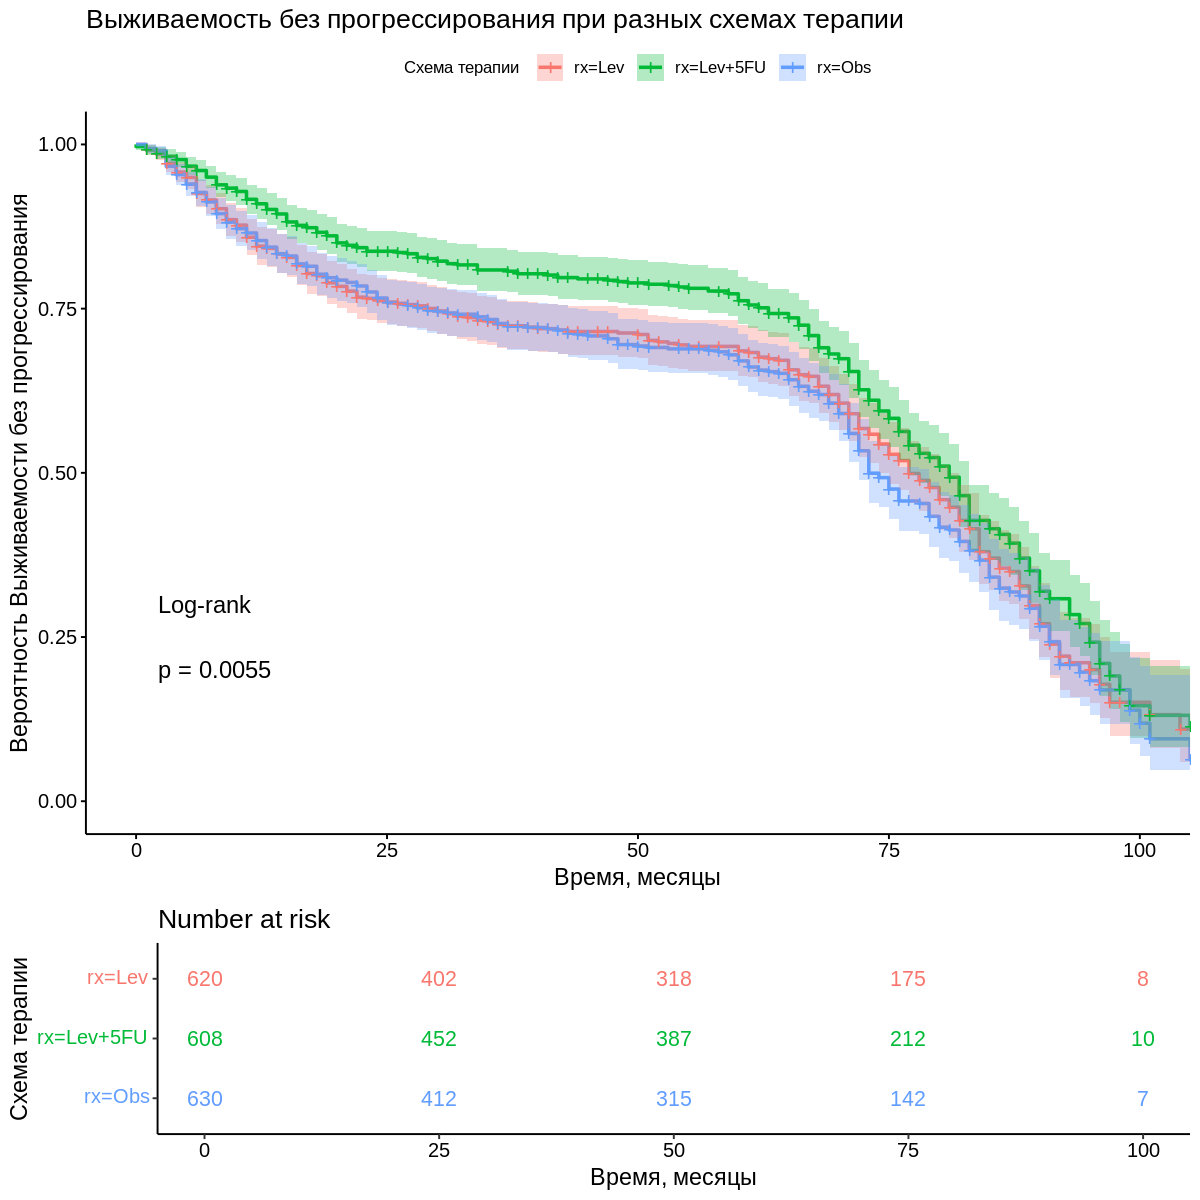

In [21]:
ggsurvplot(pfs_fit, data = data, pval = TRUE, conf.int = TRUE,
           pval.method = TRUE,
           risk.table = TRUE,
           risk.table.col = "strata",
           xlab = "Время, месяцы",
           ylab = "Вероятность Выживаемости без прогрессирования",
           title = "Выживаемость без прогрессирования при разных схемах терапии",
           legend.title = "Схема терапии")

In [22]:
summary(pfs_fit, times = 60)

Call: survfit(formula = pfs_data ~ rx, data = data)

                rx=Lev 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     301.0000     177.0000       0.6856       0.0199       0.6477 
upper 95% CI 
      0.7258 

                rx=Lev+5FU 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     366.0000     133.0000       0.7620       0.0182       0.7272 
upper 95% CI 
      0.7985 

                rx=Obs 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     296.0000     187.0000       0.6704       0.0201       0.6321 
upper 95% CI 
      0.7111 


In [82]:
pfs_table <- pfs_fit %>%
  tbl_survfit(
    times = 60,
    label_header = "**5-летняя выживаемость без прогрессирования  (95% ДИ)**"
  )

In [83]:
# Вывод таблицы для PFS как HTML
as_gt(pfs_table) %>%
  gt::as_raw_html() %>%
  display_html()

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>Characteristic</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> Characteristic 
 <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>5-летняя выживаемость без прогрессирования (95% ДИ)</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: center;" bgcolor="#FFFFFF" valign="bottom" align="center"> 5-летняя выживаемость без прогрессирования (95% ДИ) 
 
 
 
 rx 
 
     Lev 
 69% (65%, 73%) 
     Lev+5FU 
 76% (73%, 80%) 
     Obs 
 67% (63%, 71%)

In [23]:
names(data)

[1] "id"          "study"       "rx"          "sex"         "age"        
 [6] "obstruct"    "perfor"      "adhere"      "nodes"       "status"     
[11] "differ"      "extent"      "surg"        "node4"       "time"       
[16] "etype"       "time.months"

Call:
coxph(formula = os_data ~ rx + sex + age + obstruct + perfor + 
    adhere + nodes + differ + extent + surg + node4, data = data)

  n= 1776, number of events= 888 
   (82 observations deleted due to missingness)

               coef exp(coef)  se(coef)      z Pr(>|z|)    
rxLev+5FU -0.230446  0.794180  0.083765 -2.751  0.00594 ** 
rxObs      0.105186  1.110917  0.082548  1.274  0.20258    
sex1       0.018428  1.018599  0.067875  0.271  0.78601    
age        0.005649  1.005665  0.003030  1.864  0.06232 .  
obstruct1  0.140920  1.151333  0.088419  1.594  0.11099    
perfor1    0.156308  1.169186  0.202656  0.771  0.44053    
adhere1    0.058143  1.059866  0.099450  0.585  0.55879    
nodes      0.053605  1.055068  0.013548  3.957  7.6e-05 ***
differ     0.084822  1.088523  0.070961  1.195  0.23196    
extent     0.218782  1.244561  0.071987  3.039  0.00237 ** 
surg1      0.056362  1.057980  0.076463  0.737  0.46106    
node41     0.357883  1.430299  0.113639  3.149  0.00164 ** 


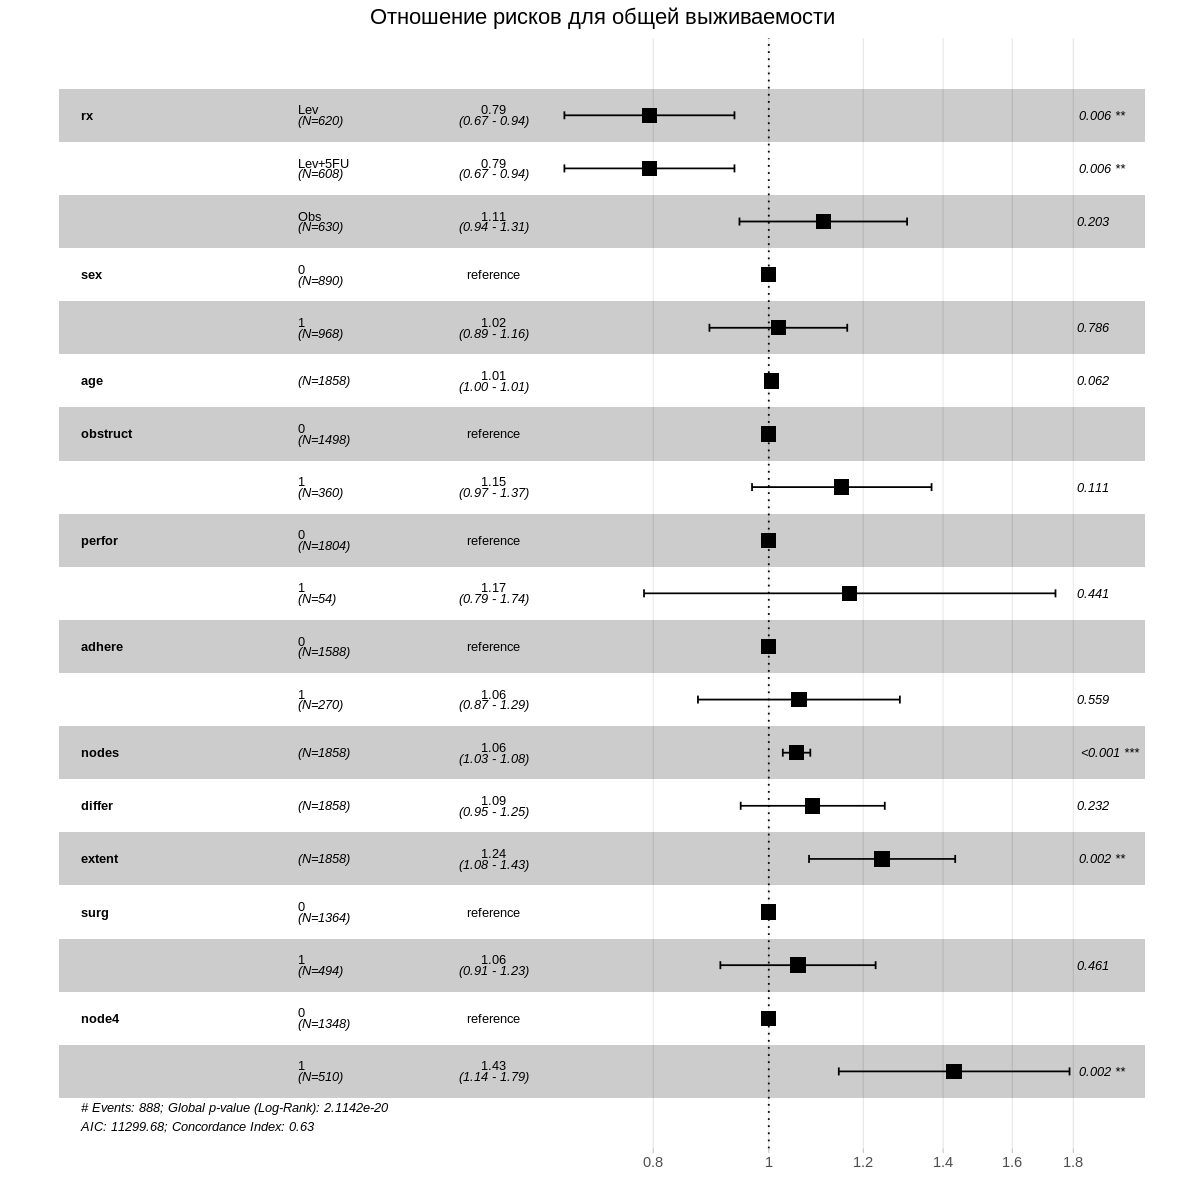

In [55]:
# Модель Кокса для OS
fit_os_cox <- coxph(os_data ~ rx + sex + age + obstruct + perfor + adhere + nodes + differ + extent + surg + node4, data = data)
summary(fit_os_cox)
ggforest(fit_os_cox, data = data, main = "Отношение рисков для общей выживаемости")

#### Результаты модели Кокса для Общей выживаемости (OS):

В модель были взяты следующие переменные:
> - метод лечения (`rx`)
- пол (`sex`)
- возраст (`age`)
- наличие обструкции (`obstruct`)
-  перфорации (`perfor`)
-  адгезии (`adhere`)
- количество пораженных лимфатических узлов (`nodes`)
- степень дифференцировки опухоли (`differ`)
- степень распространения заболевания (`extent`)
- факт проведения хирургического вмешательства (`surg`)
- поражение сторожевого лимфатического узла (`node4`)

##### Основные результаты

> - **Количество наблюдений (n):** 1776
- **Количество событий (смертей):** 888
- **Удалено наблюдений из-за пропусков:** 82

##### Интерпретация результатов по каждой компоненте

1. **Lev+5FU:**
  - Пациенты, получающие Лейковорин в комбинации с 5-фторурацилом, имеют на 20.6% меньший риск смерти по сравнению с контрольной группой (Obs) (p < 0.01).

2. **Lev:**
  - Пациенты, получающие Лейковорин, имеют сопоставимый (на 11.8% больше чем Lev+5FU) риск смерти по сравнению с контрольной группой (Obs).

3. **Obs:** (контрольная группа):
  - Эта группа используется как базовая линия для сравнения.

4. **sex, obstruct, perfor, adhere, differ, surg:**
  - `Пол` (мужчины по сравнению с женщинами), наличие `обструкции`, `перфорации`, `адгезии`, `проведение хирургического вмешательства` и `степень дифференцировки опухоли` - все эти показатели не оказывают значимого влияния на риск смерти.

5. **age:**
  - `Возраст` имеет пограничное статистическое влияние на риск смерти (p < 0.1).

6. **nodes:**
  - Увеличение числа пораженных лимфатических узлов ассоциируется с увеличением риска смерти на 8.6% на каждый узел. Количество пораженных лимфатических узлов имеет значительное влияние на риск смерти (p < 0.001).

7. **extent:**
  - Степень распространения опухоли ассоциируется с увеличением риска смерти на 25.8% и имеет значительное влияние на риск смерти (p < 0.01).

8. **node4:**
  - Поражение четвертого лимфатического узла имеет значительное влияние на риск смерти (p < 0.01).

##### Общие результаты тестов модели:

    Конкорданс (Concordance): 0.635 (se = 0.01)
        Модель имеет умеренную способность различать события (63.5%).

    Тест правдоподобия (Likelihood ratio test): 122.3 на 12 степеней свободы, p < 2e-16
        Модель в целом значима (p < 0.001).

    Тест Вальда (Wald test): 134.4 на 12 степеней свободы, p < 2e-16
        Модель в целом значима (p < 0.001).

    Логранговый тест (Score (logrank) test): 139.4 на 12 степеней свободы, p < 2e-16
        Модель в целом значима (p < 0.001).

##### Выводы:

1. Комбинация **Лейковорин + 5-фторурацил** показала значительное снижение риска смерти.
2. Результаты терапии **Лейковорином** совпадают с **Obs (Плацебо)** в модели Каплана-Майера. Однако в модели Кокса ДИ **Lev** совпадает с ДИ **Lev+5FU**.
3. **Количество пораженных лимфатических узлов**, **степень распространения опухоли** и **поражение сторожевого лимфатического узла** оказывают значительное влияние на риск смерти.
4. **Возраст** имеет пограничное влияние на риск смерти.
5. **Пол, наличие обструкции, перфорации, адгезии, степень дифференцировки опухоли и проведение хирургического вмешательства** не оказывают значимого влияния на риск смерти в данной модели.

Call:
coxph(formula = pfs_data ~ rx + sex + age + obstruct + perfor + 
    adhere + nodes + differ + extent + surg + node4, data = data)

  n= 1776, number of events= 888 
   (82 observations deleted due to missingness)

               coef exp(coef)  se(coef)      z Pr(>|z|)   
rxLev+5FU -0.183328  0.832495  0.083649 -2.192  0.02841 * 
rxObs      0.079766  1.083033  0.082349  0.969  0.33273   
sex1       0.014666  1.014774  0.067758  0.216  0.82864   
age        0.004730  1.004742  0.002997  1.578  0.11454   
obstruct1  0.127997  1.136550  0.087832  1.457  0.14503   
perfor1    0.107053  1.112993  0.201698  0.531  0.59559   
adhere1    0.050310  1.051597  0.099116  0.508  0.61174   
nodes      0.039528  1.040320  0.013638  2.898  0.00375 **
differ     0.077677  1.080774  0.070179  1.107  0.26836   
extent     0.194537  1.214749  0.071809  2.709  0.00675 **
surg1      0.039629  1.040425  0.076316  0.519  0.60357   
node41     0.311063  1.364875  0.114539  2.716  0.00661 **
---
Signif. 

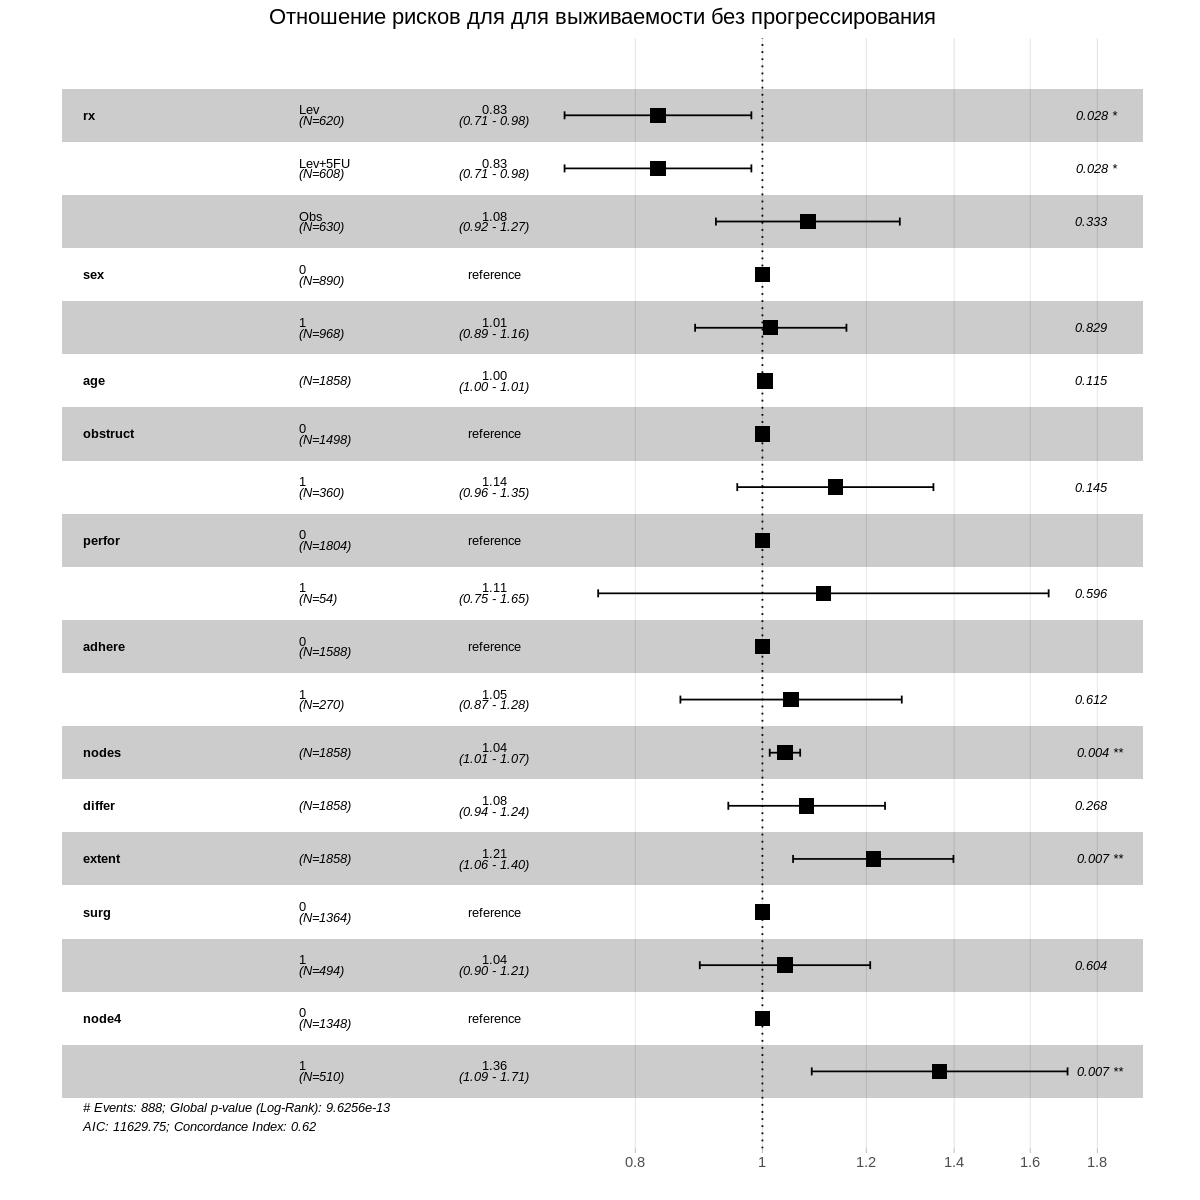

In [56]:
# Модель Кокса для PFS
fit_pfs_cox <- coxph(pfs_data ~ rx + sex + age + obstruct + perfor + adhere + nodes + differ + extent + surg + node4, data = data)
summary(fit_pfs_cox)
ggforest(fit_pfs_cox, data = data, main = "Отношение рисков для для выживаемости без прогрессирования")

#### Результаты модели Кокса для Выживаемости без прогрессирования (PFS):

Переменные модели идетичны модели Кокса для общей выживаемости.

Результаты модели Кокса для Выживаемости без прогрессирования (PFS) практически повторяют результыты для Общей выживаемости (OS) с небольшим различием в цифрах коэффициентов.  
  
Уровень значимости для **Lev+5FU** уменьшился до 0,05 по сравнению с моделью для Общей выживаемости.
1. **Lev+5FU:**
  - Пациенты, получающие Лейковорин в комбинации с 5-фторурацилом, имеют на 16.8% меньший риск прогрессирования или смерти по сравнению с контрольной группой (Obs) (p < 0.05).

2. Остальные переменные повторяют характеристики модели для Общей выживаемости.
  
##### Общие результаты тестов модели:

    Конкорданс (Concordance): 0.617 (se = 0.01)
        Модель имеет умеренную способность различать события (61.7%).

    Тест правдоподобия (Likelihood ratio test): 83.31 на 12 степеней свободы, p = 1e-12
        Модель в целом значима (p < 0.001).

    Тест Вальда (Wald test): 89.2 на 12 степеней свободы, p = 7e-14
        Модель в целом значима (p < 0.001).

    Логранговый тест (Score (logrank) test): 91.42 на 12 степеней свободы, p = 3e-14
        Модель в целом значима (p < 0.001).

##### Выводы (практически совпадают с выводами для модели Общей выживаемости):

1. Терапия КРР комбинацией **Лейковорин + 5-фторурацил** статистически значимо снижает риск прогрессирования или смерти по сравнению с контрольной группой.
2. **Количество пораженных лимфатических узлов**, **степень распространения опухоли** и **поражение сторожевого лимфатического узла** оказывают значительное влияние на риск на риск прогрессирования или смерти.
3. **Пол, возраст, наличие обструкции, перфорации, адгезии, степень дифференцировки опухоли и проведение хирургического вмешательства** не оказывают значимого влияния на риск на риск прогрессирования или смерти в данной модели.

In [26]:
os_logrank <- survdiff(os_data ~ rx, data = data)
print(os_logrank)

Call:
survdiff(formula = os_data ~ rx, data = data)

             N Observed Expected (O-E)^2/E (O-E)^2/V
rx=Lev     620      310      294     0.862      1.30
rx=Lev+5FU 608      304      358     8.196     13.80
rx=Obs     630      315      277     5.288      7.76

 Chisq= 14.8  on 2 degrees of freedom, p= 6e-04 


In [27]:
pfs_logrank <- survdiff(pfs_data ~ rx, data = data)
print(pfs_logrank)

Call:
survdiff(formula = pfs_data ~ rx, data = data)

             N Observed Expected (O-E)^2/E (O-E)^2/V
rx=Lev     620      310      297     0.573     0.863
rx=Lev+5FU 608      304      349     5.848     9.661
rx=Obs     630      315      283     3.653     5.394

 Chisq= 10.4  on 2 degrees of freedom, p= 0.006 


### Общая выживаемость (Overall Survival, OS) и Выживаемость без прогрессирования (Progression-Free Survival, PFS) при поражении сторожевого лимфатического узла

In [68]:
# Построение моделей Каплана-Мейера для OS и PFS
os_node_fit <- survfit(os_data ~ node4, data = data)
pfs_node_fit <- survfit(pfs_data ~ node4, data = data)

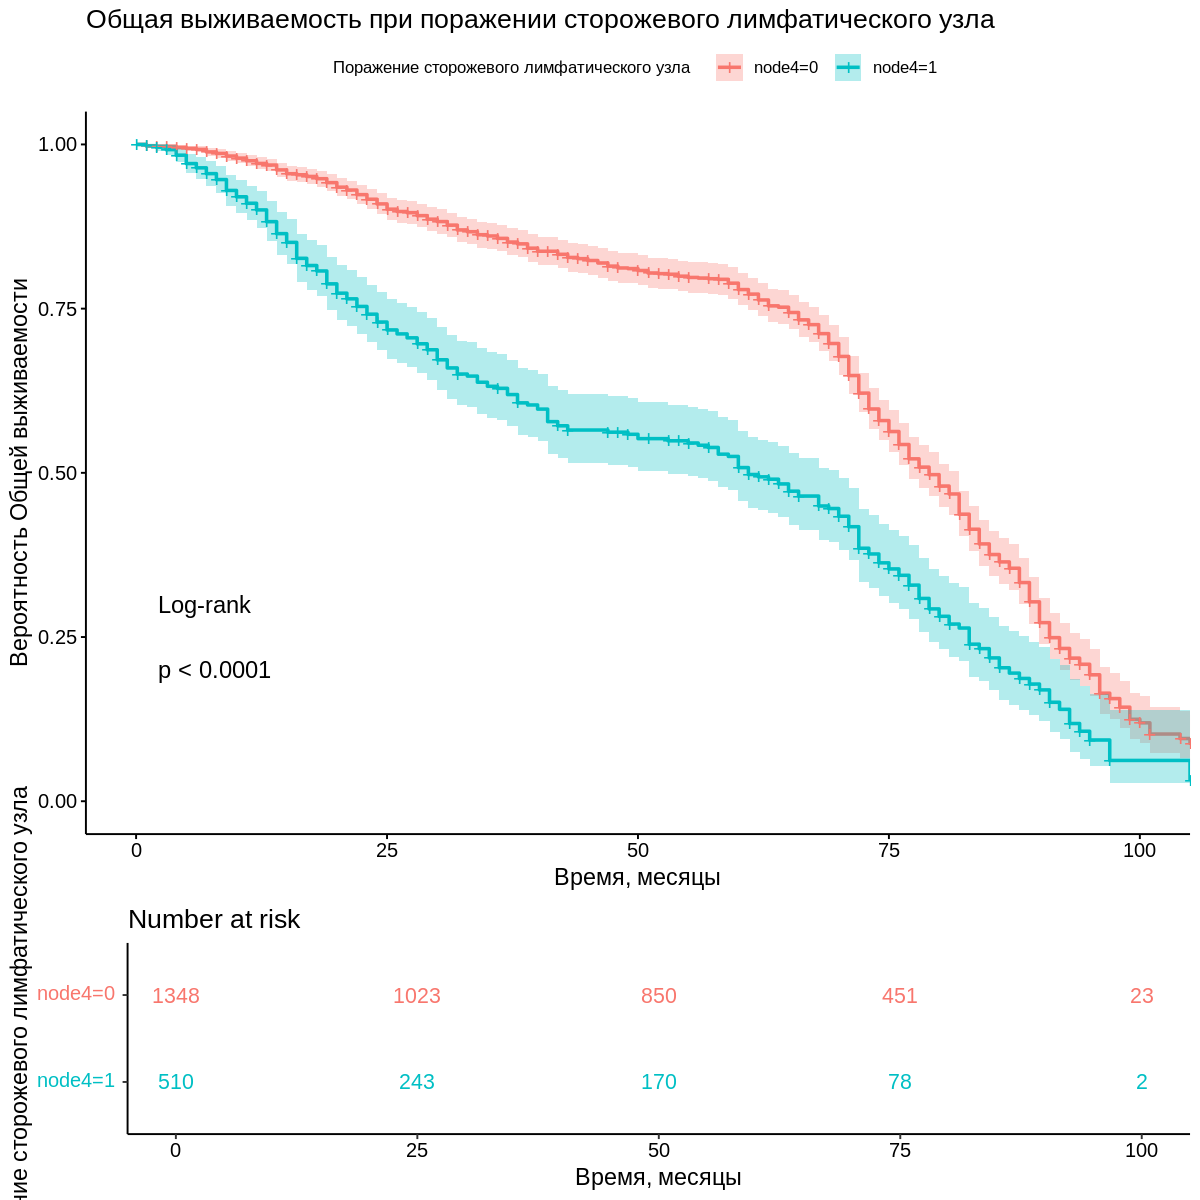

In [88]:
# Визуализация кривых выживаемости
ggsurvplot(os_node_fit, data = data, pval = TRUE, conf.int = TRUE,
           pval.method = TRUE,
           risk.table = TRUE,
           risk.table.col = "strata",
           xlab = "Время, месяцы",
           ylab = "Вероятность Общей выживаемости",
           title = "Общая выживаемость при поражении сторожевого лимфатического узла",
           legend.title = "Поражение сторожевого лимфатического узла")

In [77]:
summary(os_node_fit, times = 60)

Call: survfit(formula = os_data ~ node4, data = data)

                node4=0 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     809.0000     249.0000       0.7790       0.0124       0.7550 
upper 95% CI 
      0.8038 

                node4=1 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     154.0000     176.0000       0.5080       0.0273       0.4572 
upper 95% CI 
      0.5644 


In [78]:
os_node_table <- os_node_fit %>%
  tbl_survfit(
    times = 60,
    label_header = "**5-летняя выживаемость (95% ДИ)**"
  )

In [66]:
# Вывод таблицы для OS как HTML
as_gt(os_node_table) %>%
  gt::as_raw_html() %>%
  display_html()

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>Characteristic</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> Characteristic 
 <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>5-летняя выживаемость (95% ДИ)</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: center;" bgcolor="#FFFFFF" valign="bottom" align="center"> 5-летняя выживаемость (95% ДИ) 
 
 
 
 node4 
 
     0 
 78% (76%, 80%) 
     1 
 51% (46%, 56%)

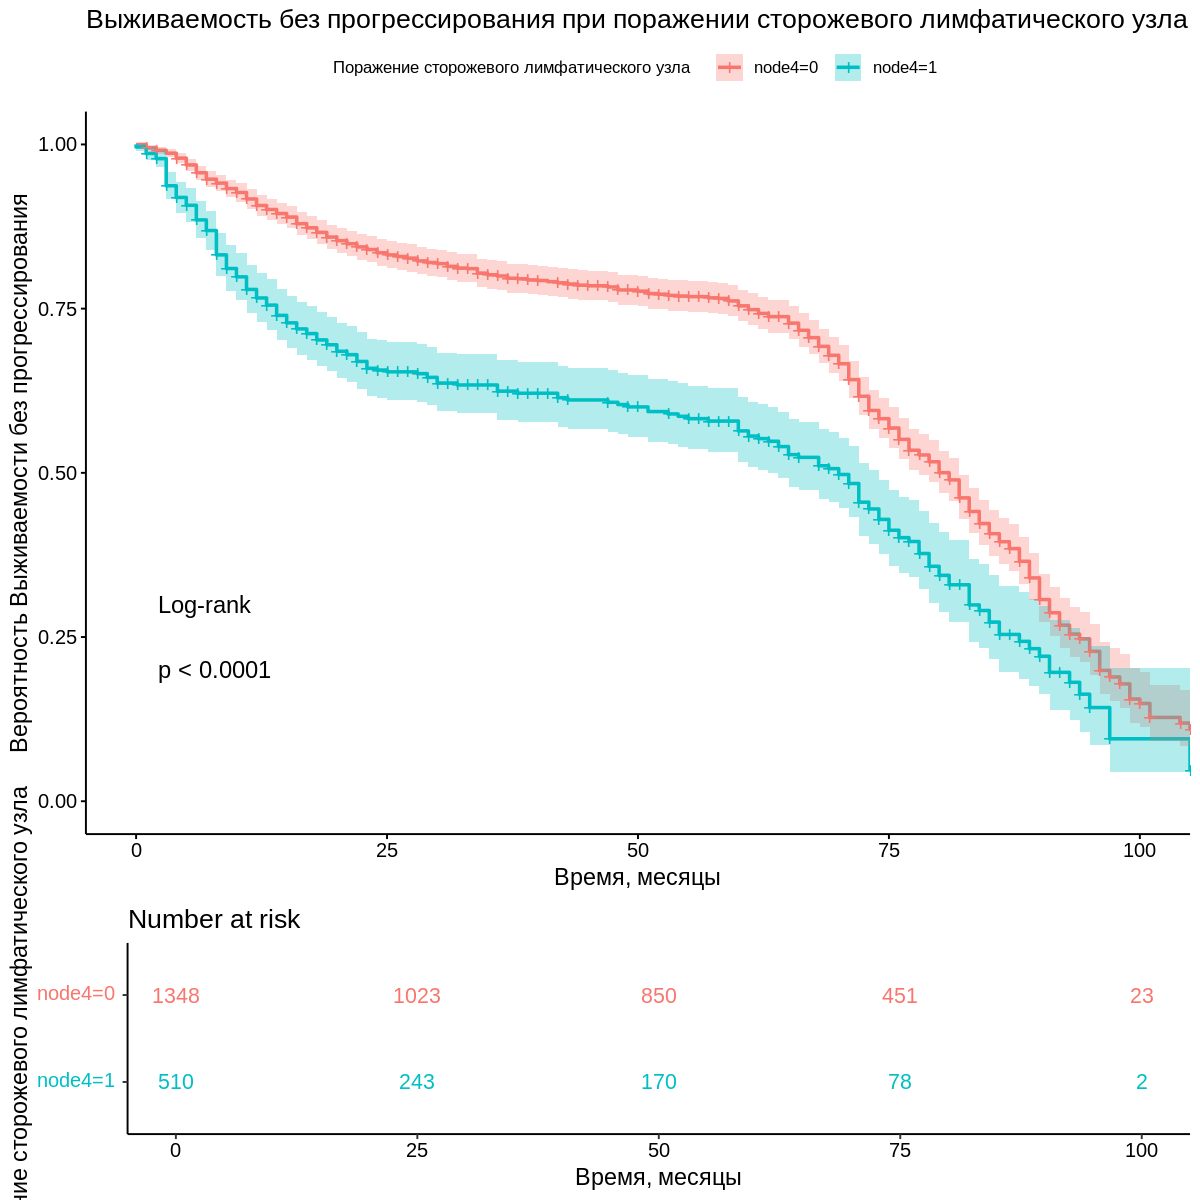

In [87]:
ggsurvplot(pfs_node_fit, data = data, pval = TRUE, conf.int = TRUE,
           pval.method = TRUE,
           risk.table = TRUE,
           risk.table.col = "strata",
           xlab = "Время, месяцы",
           ylab = "Вероятность Выживаемости без прогрессирования",
           title = "Выживаемость без прогрессирования при поражении сторожевого лимфатического узла",
           legend.title = "Поражение сторожевого лимфатического узла")

In [79]:
summary(pfs_node_fit, times = 60)

Call: survfit(formula = pfs_data ~ node4, data = data)

                node4=0 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     809.0000     308.0000       0.7542       0.0123       0.7305 
upper 95% CI 
      0.7786 

                node4=1 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     60.0000     154.0000     189.0000       0.5638       0.0252       0.5166 
upper 95% CI 
      0.6154 


In [84]:
pfs_node_table <- pfs_node_fit %>%
  tbl_survfit(
    times = 60,
    label_header = "**5-летняя выживаемость без прогрессирования (95% ДИ)**"
  )

In [85]:
# Вывод таблицы для OS как HTML
as_gt(pfs_node_table) %>%
  gt::as_raw_html() %>%
  display_html()

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>Characteristic</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> Characteristic 
 <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="<span class='gt_from_md'><strong>5-летняя выживаемость без прогрессирования (95% ДИ)</strong></span>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: center;" bgcolor="#FFFFFF" valign="bottom" align="center"> 5-летняя выживаемость без прогрессирования (95% ДИ) 
 
 
 
 node4 
 
     0 
 75% (73%, 78%) 
     1 
 56% (52%, 62%)

**Вывод:**  
При поражении четвертого лимфатического узла Общая 5-летняя выживаемость снижается на 27%, Выживаемость без прогрессирования снижается на 19%